                            AVIATION SAFETY ANALYSIS AND CLASSIFIER PREDICTION MODEL


# IMPORT LIBRARYES

In [68]:
import pandas as pd
import os
import numpy as np
import seaborn as sns 
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier,plot_tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from pycaret.classification import *
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,accuracy_score,precision_score,recall_score,plot_roc_curve



# EXTRACT AND MERGE FILES

In [69]:
# Data set extraction from ICAO API website
a2008 = pd.read_csv('data1/Accidents2008.csv')
a2009 = pd.read_csv('data1/Accidents2009.csv')
a2010 = pd.read_csv('data1/Accidents2010.csv')
a2011 = pd.read_csv('data1/Accidents2011.csv')
a2012 = pd.read_csv('data1/Accidents2012.csv')
a2013 = pd.read_csv('data1/Accidents2013.csv')
a2014 = pd.read_csv('data1/Accidents2014.csv')
a2015 = pd.read_csv('data1/Accidents2015.csv')
a2016 = pd.read_csv('data1/Accidents2016.csv')
a2017 = pd.read_csv('data1/Accidents2017.csv')
a2018 = pd.read_csv('data1/Accidents2018.csv')
a2019 = pd.read_csv('data1/Accidents2019.csv')
a2020 = pd.read_csv('data1/Accidents2020.csv')
a2021 = pd.read_csv('data1/Accidents2021.csv')
a2022 = pd.read_csv('data1/Accidents2022.csv')

In [70]:
#list all data sets
all_a = [a2008,a2009,a2010,a2011,a2012,a2013,a2014,a2015,a2016,a2017,a2018,a2019,a2020,a2021,a2022]

In [71]:
#concat all data sets
ac = pd.concat(all_a)

# EXPLORATORY ANALYSIS, DATA SET CLEANING AND MANIPULATION

In [72]:
# data set preview with head
ac.head()

,Date,StateOfOccurrence,Location,Model,Registration,Operator,StateOfOperator,StateOfRegistry,FlightPhase,Class,...,InjuryLevel,TypeDesignator,Helicopter,Airplane,Engines,EngineType,Official,OccCats,Risk,Year
0,"""2008-01-02T00:00:00.000Z""",PHL,Masbate Airport (MBT),NAMC YS11 A,RP-C3592,Philippines Asian Spirit,PHL,PHL,Landing,Accident,...,None,YS11,NaN,True,2,Turboprop,True,"[""RE""]",RS,2008
1,"""2008-01-02T00:00:00.000Z""",IRN,Tehran-Mehrabad Airport (THR),FOKKER F27 100,EP-IDB,"Iran, Islamic Republic Of Iran National Airlin...",IRN,IRN,Take-off,Accident,...,None,F27,NaN,True,2,Turboprop,True,"[""F-POST"",""ICE""]",OTH,2008
2,"""2008-01-03T00:00:00.000Z""",USA,Oklahoma City,PILATUS PC12,N398J,NaN,NaN,USA,Standing,Accident,...,Fatal,PC12,False,True,1,Turboprop,NaN,"[""RAMP""]",RS,2008
3,"""2008-01-04T00:00:00.000Z""",VEN,A 20 NM del VOR del Gran Roque,LET L410 UVP,YV2081,Venezuela,VEN,VEN,En route,Accident,...,Fatal,L410,NaN,True,2,Turboprop,True,"[""SCF-PP""]",SCF,2008
4,"""2008-01-05T00:00:00.000Z""",USA,Kodiak,PIPER PA31P 350,N509FN,NaN,NaN,USA,Take-off,Accident,...,Fatal,PA47,False,True,1,Jet,NaN,"[""LOC-I"",""SCF-NP""]",LOC-I,2008


In [77]:
#check shape
ac.shape

(6109, 24)

In [74]:
#check duplicates
ac.duplicated().sum()

0

In [ ]:
# check info 
ac.info()

In [9]:
#check columns
ac.columns

Index(['Date', 'StateOfOccurrence', 'Location', 'Model', 'Registration',
       'Operator', 'StateOfOperator', 'StateOfRegistry', 'FlightPhase',
       'Class', 'Fatalities', 'Over2250', 'Over5700', 'ScheduledCommercial',
       'InjuryLevel', 'TypeDesignator', 'Helicopter', 'Airplane', 'Engines',
       'EngineType', 'Official', 'OccCats', 'Risk', 'Year'],
      dtype='object')

In [10]:
#Filter applied to select only scheduled comercial flights, with jets and turbo prop airplanes
ac = ac[(ac['ScheduledCommercial']==True) & (ac['Airplane'] == True) & (ac['EngineType']!= 'Piston')]
ac.shape

(1507, 24)

In [11]:
#drop initially useless columns 
ac = ac.drop(columns= ['Date','StateOfOccurrence','Location','Model','Registration','Operator','StateOfOperator','StateOfRegistry','Over2250','Over5700','Class','ScheduledCommercial','TypeDesignator','Helicopter','Airplane','Engines','EngineType','Official','OccCats'])
ac

,FlightPhase,Fatalities,InjuryLevel,Risk,Year
0,Landing,0.0,None,RS,2008
1,Take-off,0.0,None,OTH,2008
3,En route,14.0,Fatal,SCF,2008
7,Approach,0.0,None,SCF,2008
8,Standing,0.0,None,RS,2008
...,...,...,...,...,...
28,En route,132.0,Fatal,LOC-I,2022
33,Landing,0.0,NaN,RS,2022
35,Take-off,0.0,NaN,RS,2022
39,Landing,0.0,NaN,RS,2022


In [12]:
# check year data
ac['Year'].value_counts()

2010    164
2008    148
2011    132
2009    118
2014    118
2013    117
2019    116
2018    115
2015    100
2016     96
2017     96
2012     82
2020     77
2021     17
2022     11
Name: Year, dtype: int64

In [13]:
# Use a for loop to create the 'accidents / 1 million flights' column
ac_avg = []
for x in ac['Year']:
    if x == 2008:
        avg = round((148 * 1000000)/ 26500000,2)
    elif x == 2009:
        avg = round((118 * 1000000)/ 25900000,2)
    elif x == 2010: 
        avg = round((164 *1000000)/ 27800000,2)
    elif x == 2011: 
        avg = round((132 *1000000)/ 30100000,2)
    elif x == 2012: 
        avg = round((82 *1000000)/ 31200000,2)
    elif x == 2013: 
        avg = round((117 * 1000000)/ 32000000,2)
    elif x == 2014:
        avg = round((118 * 1000000) / 33000000,2)
    elif x == 2015:
        avg = round((100 * 1000000)/ 340000000,2)
    elif x == 2016:
        avg = round((96 *1000000) / 35200000,2)
    elif x == 2017:
        avg = round((96 * 1000000) / 36400000,2)
    elif x == 2018:
        avg = round((115 * 1000000)/ 38100000,2)
    elif x == 2019:
        avg = round((116 * 1000000)/ 38900000,2)
    elif x == 2020:
        avg = round((77 * 1000000)/ 16900000,2)
    elif x == 2021:
        avg = round((17 * 1000000)/ 19300000,2)
    else:
        avg = round((11 * 1000000)/10750000,2)
    ac_avg.append(avg)
    
    ac_avg

In [14]:
#Create respective column
ac['acc/1MillionFlights'] = ac_avg

In [15]:
#check injury level values
ac['InjuryLevel'].value_counts()

None       469
Serious    198
Fatal      168
Minor       62
Unknown     59
Name: InjuryLevel, dtype: int64

In [16]:
#checl nulls on injury level column
ac['InjuryLevel'].isnull().sum()

551

In [17]:
#lead with nulls
ac['InjuryLevel'].fillna('unknown',inplace=True)

In [18]:
#create a list to classify  injury level column in only two categories
il_update = []
for x in ac['InjuryLevel']:
    if x in ['Serious','Fatal']:
        x = 'Serious/Fatal'
    else:
        x = 'Minor/None'
    il_update.append(x)

In [19]:
# update injury level column  for only two categories
ac['InjuryLevel'] = il_update

In [20]:
#apply lambda do transform in numerics (binary)
ac['InjuryLevel']=ac['InjuryLevel'].apply(lambda x: 1 if x== 'Serious/Fatal' else 0)

In [21]:
#rename it to serius fatal column
ac['Serious/Fatal'] = ac['InjuryLevel']

In [22]:
#drop the now useless injury level column
ac.drop(columns= ['InjuryLevel'], inplace=True)

In [23]:
#check updated data set
ac

,FlightPhase,Fatalities,Risk,Year,acc/1MillionFlights,Serious/Fatal
0,Landing,0.0,RS,2008,5.58,0
1,Take-off,0.0,OTH,2008,5.58,0
3,En route,14.0,SCF,2008,5.58,1
7,Approach,0.0,SCF,2008,5.58,0
8,Standing,0.0,RS,2008,5.58,0
...,...,...,...,...,...,...
28,En route,132.0,LOC-I,2022,1.02,1
33,Landing,0.0,RS,2022,1.02,0
35,Take-off,0.0,RS,2022,1.02,0
39,Landing,0.0,RS,2022,1.02,0


# Column 'Fatalities' is leaking data, let's drop it!

In [24]:
# drop it!
ac.drop(columns=['Fatalities'],inplace=True)

In [25]:
#deal with nulls on flight phase column
ac['FlightPhase'].fillna('Unknown',inplace=True)

In [26]:
#check it
ac['FlightPhase'].isnull().sum()

0

In [27]:
#check values on it
ac['FlightPhase'].value_counts().head(10)

Landing          461
Unknown          285
En route         199
Taxi             156
Take-off         155
Approach         122
Standing         105
Initial Climb     17
Manoeuvring        7
Name: FlightPhase, dtype: int64

In [28]:
#apply label encoder to convert flight phase column to numerics
labencoder = LabelEncoder()
labencoder.fit(ac['FlightPhase'])

LabelEncoder()

In [29]:
# inplace it 
ac['FlightPhase'] = labencoder.fit_transform(ac['FlightPhase'])

In [30]:
#check classes
labencoder.classes_

array(['Approach', 'En route', 'Initial Climb', 'Landing', 'Manoeuvring',
       'Standing', 'Take-off', 'Taxi', 'Unknown'], dtype=object)

In [31]:
#apply label encoder to convert to risk column to numerics
labencoder = LabelEncoder()
labencoder.fit(ac['Risk'])

LabelEncoder()

In [33]:
#inplace it 
ac['Risk'] = labencoder.fit_transform(ac['Risk'])

In [34]:
#ordenate columns as convenient
col = ['Year','FlightPhase','Risk','Serious/Fatal','acc/1MillionFlights']

In [35]:
#inplace it
ac = ac.loc[:,col]


In [36]:
#check updated data set
ac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1507 entries, 0 to 43
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1507 non-null   int64  
 1   FlightPhase          1507 non-null   int64  
 2   Risk                 1507 non-null   int64  
 3   Serious/Fatal        1507 non-null   int64  
 4   acc/1MillionFlights  1507 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 70.6 KB


In [37]:
# check if there are still nulls
ac.isnull().sum()

Year                   0
FlightPhase            0
Risk                   0
Serious/Fatal          0
acc/1MillionFlights    0
dtype: int64

# MODELING

In [38]:
#create X and Y
X = ac.drop(columns=['Serious/Fatal'])
y = ac['Serious/Fatal']

In [39]:
#split train/test variables
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

In [78]:
#check X_train
X_train.head()

,Year,FlightPhase,Risk,acc/1MillionFlights
106,2012,1,31,2.63
73,2015,7,30,0.29
118,2012,4,30,2.63
128,2015,7,6,0.29
191,2017,1,30,2.64


In [79]:
#check y_train
y_train

106    0
73     0
118    0
128    0
191    0
      ..
219    0
20     0
333    0
132    0
212    0
Name: Serious/Fatal, Length: 1205, dtype: int64

In [41]:
#create sklearn pipeline for firstly apply logistic regression model and fit it
pipeline = Pipeline(steps=[('model', LogisticRegression())])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('model', LogisticRegression())])

In [42]:
#create y prediction
y_pred= pipeline.predict(X_test)

In [43]:
#check logistic regression accuracy score 
pipeline.score(X_test, y_test)

0.7582781456953642

In [44]:
#check logistic regression precision score
precision1_score = precision_score(y_test,pipeline.predict(X_test))
precision1_score

0.6388888888888888

In [45]:
#check logistic regression recall score
recall1_score = recall_score(y_test, pipeline.predict(X_test))
recall1_score

0.27710843373493976

In [46]:
#check columns importance
pd.DataFrame(pipeline.named_steps['model'].coef_,columns=X_train.columns)

,Year,FlightPhase,Risk,acc/1MillionFlights
0,0.000258,-0.396183,-0.014086,0.034017


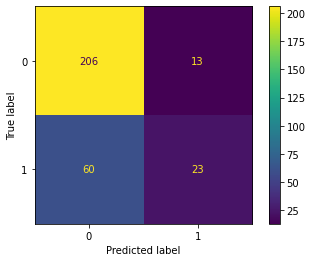

In [47]:
#plot confusion matrix for Logistic Regression model
plot_confusion_matrix(pipeline.named_steps['model'], X_test, y_test, values_format='.0f')
plt.savefig('confusion_matrix_logistic_regression.png')

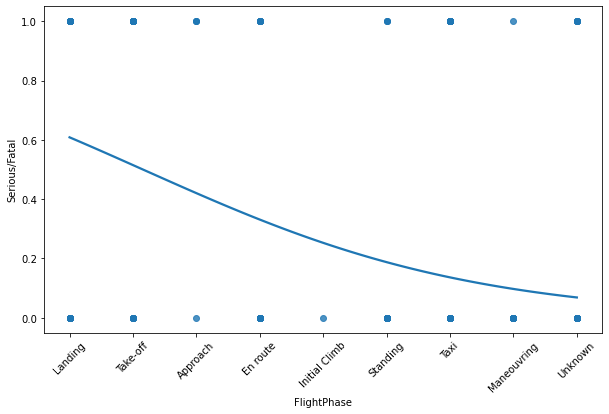

In [48]:
#plot regplot to check the most relevant column (flight phase)
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x=X_test['FlightPhase'], y=y_test, data=ac, logistic=True, ci=None)
plt.xticks(ticks = range(0,9),labels=['Landing','Take-off','Approach','En route','Initial Climb',
       'Standing','Taxi','Maneouvring','Unknown'],rotation=45)
plt.savefig('injuries_FlightPhase_regplot.png');

In [80]:
#create sklearn pipeline for firstly apply logistic regression model and fit it
pipeline = Pipeline(steps=[('classifier',DecisionTreeClassifier(max_depth=3))])
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('classifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=3,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        random_state=None, splitter='best'))],
         verbose=False)

In [63]:
#create y prediction
y_pred = pipeline.predict(X_test)

In [64]:
#check tree decision accuracy score
pipeline.score(X_test,y_test)

0.8245033112582781

In [52]:
#check tree decision precision score
precision2_score = precision_score(y_test,pipeline.predict(X_test))
precision2_score

0.8

In [53]:
#check tree decision recall score
recall2_score = recall_score(y_test, pipeline.predict(X_test))
recall2_score

0.4819277108433735

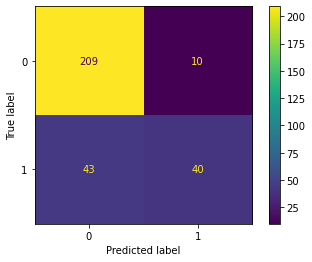

In [54]:
#plot confusion matrix for Tree Decision model
plot_confusion_matrix(pipeline.named_steps['classifier'], X_test, y_test, values_format='.0f')

plt.savefig('confusion_matrix_tree_descision.png')

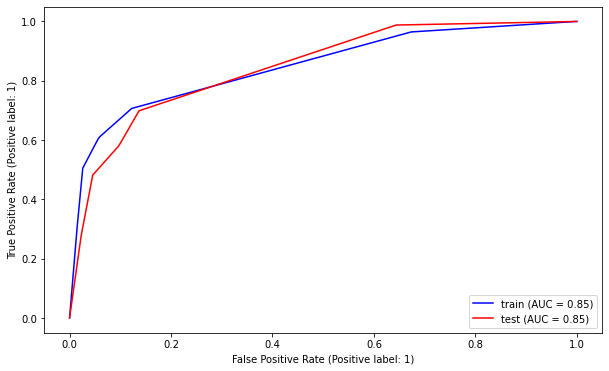

In [55]:
#plot roc curve to check possible leaks
fig, ax = plt.subplots(figsize=(10,6))

plot_roc_curve(pipeline, X_train, y_train, color='blue', ax= ax, name='train')
plot_roc_curve(pipeline, X_test, y_test, color='red', ax= ax, name='test')
              
plt.savefig('roc_curve.png');


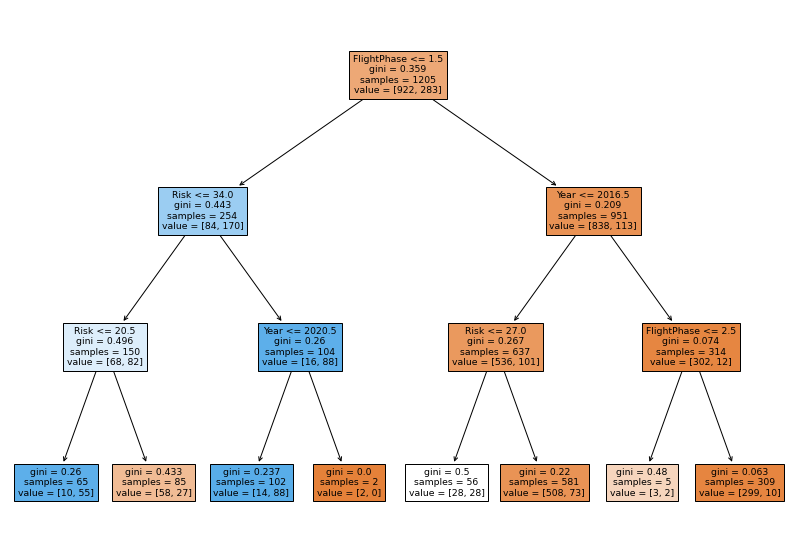

In [56]:
# plot_tree to check Decision Tree performance
fig,ax = plt.subplots(figsize=(14,10))
plot_tree(pipeline.named_steps['classifier'],feature_names = X.columns,filled=True)
plt.savefig('decision_tree.png'); 


# PYCARET PIPELINE

In [57]:
#split pycaret train/test variables
data_train, data_test = train_test_split(ac, test_size=0.1,random_state=42)

In [58]:
#check classifications
classification = setup(data=data_train, target = 'Serious/Fatal',session_id=42,fold_shuffle=True)

,Description,Value
0,session_id,42
1,Target,Serious/Fatal
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1356, 5)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [59]:
#compare and check best model
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8693,0.8628,0.6120,0.8124,0.6916,0.6117,0.6254,0.0870
xgboost,Extreme Gradient Boosting,0.8662,0.8497,0.6636,0.7669,0.7043,0.6192,0.6269,0.1540
lightgbm,Light Gradient Boosting Machine,0.8661,0.8506,0.6502,0.7714,0.6996,0.6151,0.6227,0.2350
catboost,CatBoost Classifier,0.8630,0.8553,0.6163,0.7837,0.6832,0.5984,0.6095,0.3320
knn,K Neighbors Classifier,0.8609,0.8227,0.6462,0.7514,0.6916,0.6029,0.6079,0.0320
ada,Ada Boost Classifier,0.8567,0.8405,0.6034,0.7670,0.6697,0.5807,0.5910,0.0900
rf,Random Forest Classifier,0.8556,0.8378,0.6422,0.7404,0.6828,0.5906,0.5964,0.2550
dt,Decision Tree Classifier,0.8503,0.7769,0.6377,0.7221,0.6707,0.5755,0.5813,0.0180
ridge,Ridge Classifier,0.8503,0.0000,0.6424,0.7201,0.6732,0.5775,0.5830,0.0160
et,Extra Trees Classifier,0.8482,0.8030,0.6034,0.7307,0.6557,0.5606,0.5679,0.2140


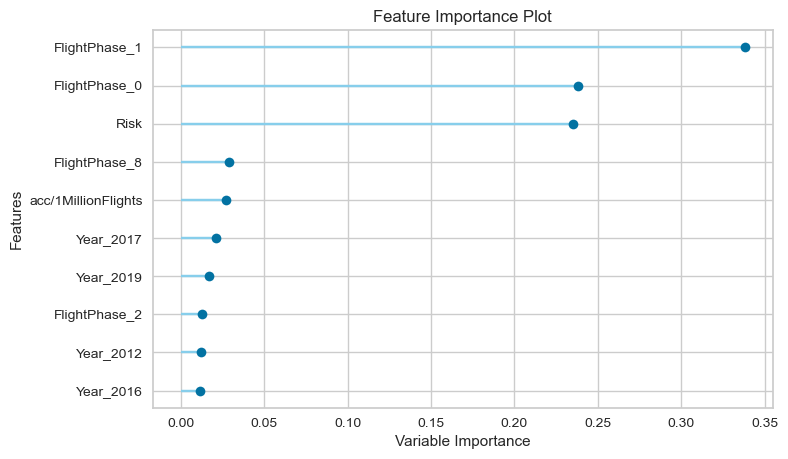

<Figure size 576x396 with 0 Axes>

In [60]:
# plot feature importance to check variable importance on selected best model
plot_model(best_model, plot='feature')
plt.savefig('feature_importance.png')

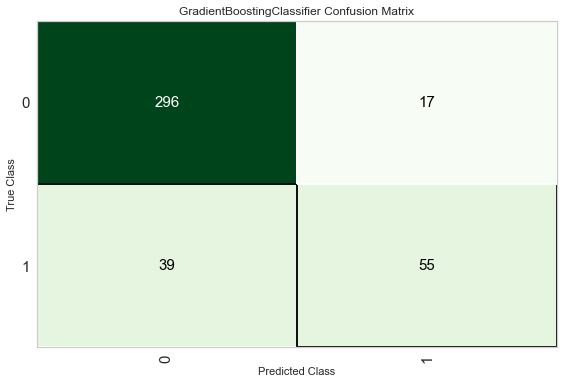

In [66]:
#plot confusion matrix check best model performance (Gradient Boosting Classifier)
plot_model(best_model, plot='confusion_matrix')